# At&t Graduation Rate Project Codes

#### Import Dataset


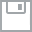
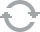
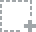
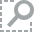
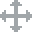
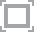
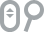
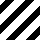
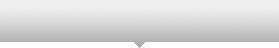
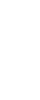
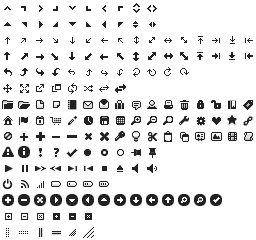
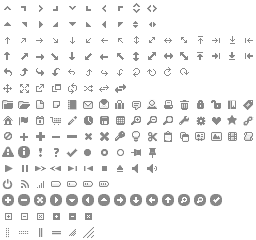
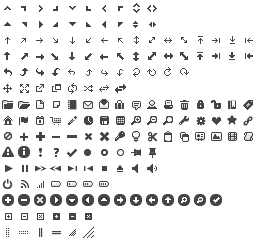
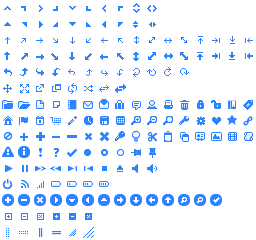
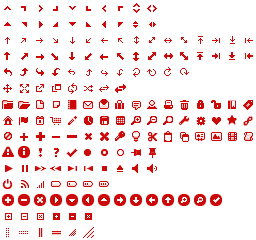
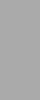
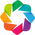
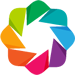

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bokeh.plotting import figure,show,output_notebook
from bokeh.models import Range1d
from scipy.optimize import curve_fit
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

output_notebook()
%matplotlib inline

In [2]:
att = pd.read_csv('~/Desktop/DataScience/Dataset/graduation-cleaned.csv')
att.head()

,Number,leaid11,STNAM,School.District,County_name,ALL_COHORT_1112,ALL_RATE_1112,Num_BGs_in_Tract,LAND_AREA,URBANIZED_AREA_POP_CEN_2010,...,pct_Mobile_Homes_ACS_08_12,pct_Mobile_Homes_ACSMOE_08_12,pct_Crowd_Occp_U_ACS_08_12,pct_Crowd_Occp_U_ACSMOE_08_12,pct_NO_PH_SRVC_ACS_08_12,pct_NO_PH_SRVC_ACSMOE_08_12,pct_No_Plumb_ACS_08_12,pct_No_Plumb_ACSMOE_08_12,pct_Recent_Built_HU_ACS_08_12,pct_Recent_Built_HU_ACSMOE_08_12
0,1,100006,ALABAMA,Marshall County School District,Marshall County,424,79,3,59.490,0,...,35.856079,6.456927,5.834602,3.212354,1.623541,1.719971,2.315964,2.891847,1.943755,3.058310
1,2,100007,ALABAMA,Hoover City School District,Jefferson County,1042,91,2,1.840,4162,...,0.000000,0.755668,0.000000,0.000000,0.645578,1.355123,0.818640,1.258787,0.000000,0.755668
2,3,100008,ALABAMA,Madison City School District,Madison County,836,91,2,4.376,3912,...,1.405975,1.932861,3.562714,3.361555,1.464129,1.266248,0.263620,0.483254,0.527241,0.834682
3,4,100013,ALABAMA,Trussville City School District,Jefferson County,300,93,4,3.539,4548,...,2.497551,3.620723,1.901141,3.036874,0.814775,1.192687,4.652302,4.545588,0.000000,0.587659
4,5,100030,ALABAMA,Alexander City City School District,Tallapoosa County,289,78,5,63.963,0,...,13.061752,4.925718,3.960000,2.786245,4.480000,3.867306,3.588749,3.583196,0.452635,0.710838


In [3]:
att.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2317 entries, 0 to 2316
Data columns (total 125 columns):
Number                              int64
leaid11                             int64
STNAM                               object
School.District                     object
County_name                         object
ALL_COHORT_1112                     int64
ALL_RATE_1112                       float64
Num_BGs_in_Tract                    int64
LAND_AREA                           float64
URBANIZED_AREA_POP_CEN_2010         int64
URBAN_CLUSTER_POP_CEN_2010          int64
RURAL_POP_CEN_2010                  int64
pct_URBANIZED_AREA_POP_CEN_2010     float64
pct_URBAN_CLUSTER_POP_CEN_2010      float64
pct_RURAL_POP_CEN_2010              float64
pct_Males_CEN_2010                  float64
pct_Males_ACS_08_12                 float64
pct_Males_ACSMOE_08_12              float64
pct_Females_CEN_2010                float64
pct_Females_ACS_08_12               float64
pct_Females_ACSMOE_08_12     

In [4]:
#partial of variables, shown to be easier to use in the following analysis
feature_names = att.columns[:]
feature_names

Index([u'Number', u'leaid11', u'STNAM', u'School.District', u'County_name',
       u'ALL_COHORT_1112', u'ALL_RATE_1112', u'Num_BGs_in_Tract', u'LAND_AREA',
       u'URBANIZED_AREA_POP_CEN_2010',
       ...
       u'pct_Mobile_Homes_ACS_08_12', u'pct_Mobile_Homes_ACSMOE_08_12',
       u'pct_Crowd_Occp_U_ACS_08_12', u'pct_Crowd_Occp_U_ACSMOE_08_12',
       u'pct_NO_PH_SRVC_ACS_08_12', u'pct_NO_PH_SRVC_ACSMOE_08_12',
       u'pct_No_Plumb_ACS_08_12', u'pct_No_Plumb_ACSMOE_08_12',
       u'pct_Recent_Built_HU_ACS_08_12', u'pct_Recent_Built_HU_ACSMOE_08_12'],
      dtype='object', length=125)

#### Graduation rate vs States 

In [5]:
#present average of graduation rate in differnet states
STGR = att.groupby('STNAM')['ALL_RATE_1112'].mean()
print STGR

STNAM
ALABAMA                 81.382979
ALASKA                  74.600000
ARIZONA                 82.633333
ARKANSAS                84.802326
CALIFORNIA              86.632143
COLORADO                74.360000
DELAWARE                77.916667
DISTRICT OF COLUMBIA    54.000000
FLORIDA                 73.818182
GEORGIA                 72.593750
HAWAII                  81.000000
ILLINOIS                85.677966
INDIANA                 88.172414
IOWA                    86.321429
KANSAS                  83.930233
LOUISIANA               76.600000
MAINE                   82.700000
MARYLAND                86.727273
MASSACHUSETTS           75.500000
MICHIGAN                77.906977
MINNESOTA               80.876923
MISSOURI                86.715385
MONTANA                 84.823529
NEBRASKA                87.571429
NEVADA                  71.727273
NEW HAMPSHIRE           85.684211
NEW JERSEY              87.257576
NEW MEXICO              72.580000
NEW YORK                83.140625
NORTH CA

In [6]:
#top 10 states vs graduation rate
STGR[STGR>87]

STNAM
INDIANA         88.172414
NEBRASKA        87.571429
NEW JERSEY      87.257576
NORTH DAKOTA    88.714286
OHIO            89.097561
PENNSYLVANIA    89.142857
TENNESSEE       90.622642
TEXAS           91.266376
VERMONT         90.000000
WISCONSIN       90.377193
Name: ALL_RATE_1112, dtype: float64

In [7]:
#see how many states are listing in the results
STGR.count()

44

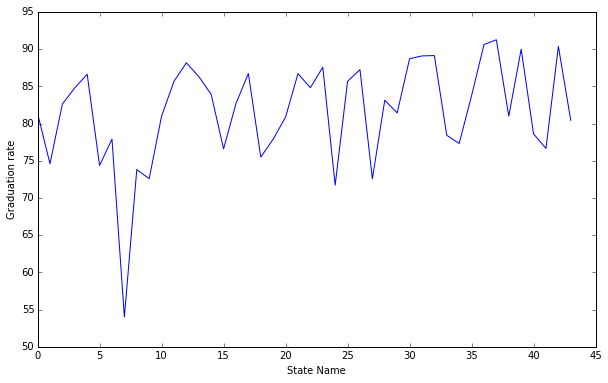

In [8]:
#plot graduation rate of each state, try to figure out a pattern
plt.figure(figsize=(10, 6), dpi=80)

plt.plot(STGR)
plt.xlabel('State Name')
plt.ylabel('Graduation rate')
plt.show('STNAM',STGR)

Can be cross analysis with weather and state location to give suggestions.

#### Poverty level vs Graduation Rate

In [9]:
#plot both poverty rate and graduation rate together based on states
pvtrate=att['pct_Prs_Blw_Pov_Lev_ACS_08_12']
pvtR = att.groupby('STNAM')['pct_Prs_Blw_Pov_Lev_ACS_08_12','ALL_RATE_1112'].mean()

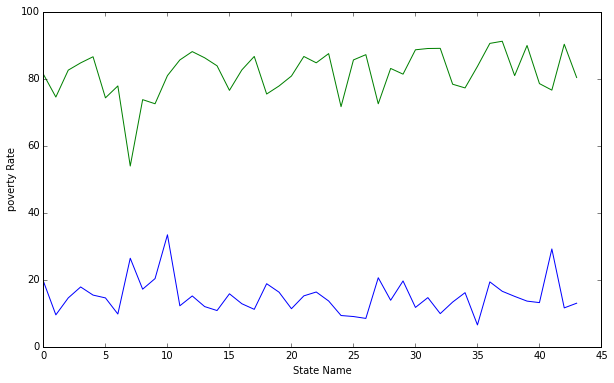

In [10]:
plt.figure(figsize=(10, 6), dpi=80)

plt.plot(pvtR)
plt.xlabel('State Name')
plt.ylabel('poverty Rate')
plt.show('STNAM',pvtR)

This figure shows that some of the states with higher poverty rate is having lower graduation rate, which means poverty is one of the causes of graduation rate, but may not be the root cause.

#### KNN model for living area status vs graduation rate
Predict graduation rate for learning center based on population living area status

In [11]:
area_cols = ['URBANIZED_AREA_POP_CEN_2010', 'URBAN_CLUSTER_POP_CEN_2010', 'RURAL_POP_CEN_2010']
X = att[area_cols]

In [12]:
y = att.ALL_RATE_1112

In [13]:
print X.shape
print y.shape

(2317, 3)
(2317,)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [15]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [16]:
#predict graduation rate for a learning center, with 1000 in urbanized, 2000in urban cluster, 1500 in rural
knn.predict([1000,2000,1500])

array([ 76.])

#### Movement rate vs graduation rate

In [17]:
mvrate=att['pct_HHD_Moved_in_ACS_08_12']
mvR = att.groupby('STNAM')['pct_HHD_Moved_in_ACS_08_12','ALL_RATE_1112'].mean()

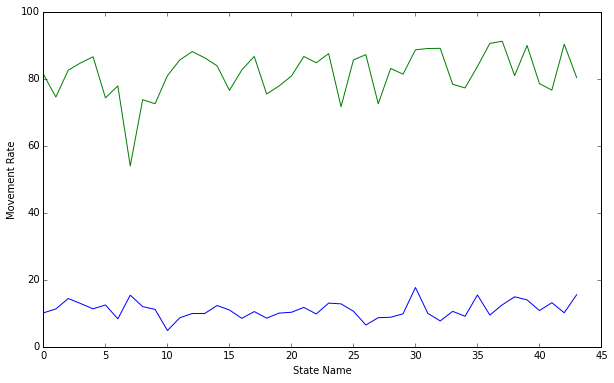

In [18]:
plt.figure(figsize=(10, 6), dpi=80)

plt.plot(mvR)
plt.xlabel('State Name')
plt.ylabel('Movement Rate')
plt.show('STNAM',mvR)

#### linear regression analysis for household movement, proverty level and graduation rates

In [19]:
data = att[['pct_HHD_Moved_in_ACS_08_12','pct_Prs_Blw_Pov_Lev_ACS_08_12','ALL_RATE_1112']]

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


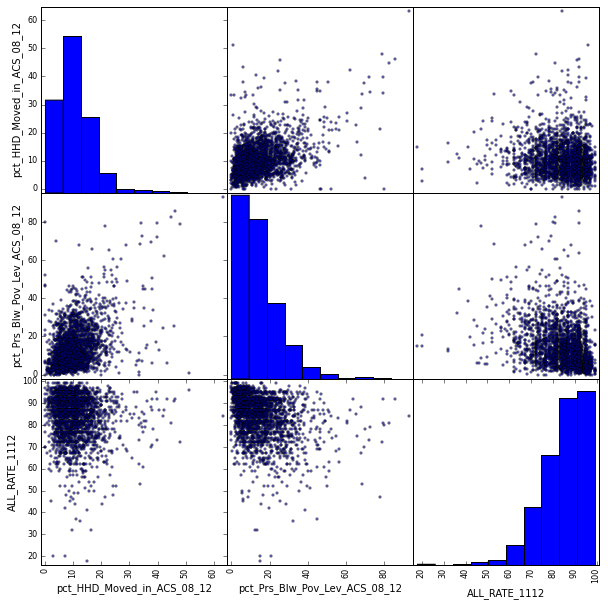

In [20]:
#impact of household movement and proverty level on Graduation Rate
from pandas.tools.plotting import scatter_matrix
scat = scatter_matrix(data, figsize = (10,10))

This graph shows positive relationship between movement and poverty level.  And negetive regression with graduation rates. Students with very little movement lead to low poverty rate and high graduation rates.


##### Linear Regression for movement and GR

In [21]:
att['pct_HHD_Moved_in_ACS_08_12'].value_counts()

0.000000     11
12.500000     4
5.263158      4
15.000000     3
5.555556      3
9.722222      2
10.857143     2
17.786923     2
9.678571      2
15.094340     2
16.071429     2
9.090909      2
8.771930      2
10.714286     2
11.090573     2
5.882353      2
5.617978      2
11.627907     2
2.556818      2
11.198738     2
7.005389      2
7.169811      2
9.765625      2
5.000000      2
7.072368      2
14.011516     2
8.051731      1
9.200969      1
5.603448      1
5.085748      1
             ..
5.307467      1
16.702203     1
7.760928      1
15.482094     1
4.126101      1
2.264151      1
2.772727      1
4.080119      1
7.793345      1
12.361878     1
11.036992     1
13.907285     1
11.722913     1
9.249330      1
4.308898      1
13.502110     1
6.896552      1
21.011236     1
6.610499      1
7.270030      1
3.669725      1
22.580645     1
6.875632      1
12.165899     1
7.501443      1
5.159264      1
8.333333      1
9.214355      1
6.763926      1
2.953240      1
Name: pct_HHD_Moved_in_A

In [22]:
att.pct_HHD_Moved_in_ACS_08_12[att.pct_HHD_Moved_in_ACS_08_12.isnull()]

397    NaN
401    NaN
426    NaN
451    NaN
453    NaN
496    NaN
499    NaN
503    NaN
528    NaN
823    NaN
855    NaN
1253   NaN
1368   NaN
1381   NaN
1520   NaN
1629   NaN
1631   NaN
1820   NaN
1838   NaN
2054   NaN
Name: pct_HHD_Moved_in_ACS_08_12, dtype: float64

In [23]:
avg_Moved = att.pct_HHD_Moved_in_ACS_08_12[att.pct_HHD_Moved_in_ACS_08_12.notnull()].mean()
att.pct_HHD_Moved_in_ACS_08_12.fillna(avg_Moved, inplace=True)

In [24]:
x = att['pct_HHD_Moved_in_ACS_08_12'].values
y = att['ALL_RATE_1112'].values
print x
print y

[  9.53830543  10.2646869   21.57149829 ...,  19.0821256   16.07142857
  16.39824305]
[ 79.  91.  91. ...,  78.  85.  87.]


In [25]:
type(x)
type(y)

numpy.ndarray

In [26]:
import statsmodels.api as sm
X = sm.add_constant(x, prepend=True)
X

array([[  1.        ,   9.53830543],
       [  1.        ,  10.2646869 ],
       [  1.        ,  21.57149829],
       ..., 
       [  1.        ,  19.0821256 ],
       [  1.        ,  16.07142857],
       [  1.        ,  16.39824305]])

In [27]:

results = sm.OLS(y, X).fit()
intercept,slope = results.params
r2 = results.rsquared

print intercept,slope
print r2

85.9274844649 -0.171490568309
0.01163657299


In [28]:
results.params

array([ 85.92748446,  -0.17149057])

In [29]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     27.26
Date:                Sat, 27 Feb 2016   Prob (F-statistic):           1.94e-07
Time:                        19:58:01   Log-Likelihood:                -8664.8
No. Observations:                2317   AIC:                         1.733e+04
Df Residuals:                    2315   BIC:                         1.734e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         85.9275      0.409    210.204      0.0

##### Linear Regression for poverty level and GR

In [30]:
att.pct_Prs_Blw_Pov_Lev_ACS_08_12[att.pct_Prs_Blw_Pov_Lev_ACS_08_12.isnull()]

401    NaN
426    NaN
451    NaN
453    NaN
496    NaN
499    NaN
503    NaN
528    NaN
823    NaN
855    NaN
1253   NaN
1368   NaN
1381   NaN
1520   NaN
1631   NaN
1820   NaN
2054   NaN
Name: pct_Prs_Blw_Pov_Lev_ACS_08_12, dtype: float64

In [31]:
avg_Blw_Pov = att.pct_Prs_Blw_Pov_Lev_ACS_08_12[att.pct_Prs_Blw_Pov_Lev_ACS_08_12.notnull()].mean()
att.pct_Prs_Blw_Pov_Lev_ACS_08_12.fillna(avg_Blw_Pov, inplace=True)

In [32]:
x = att['pct_Prs_Blw_Pov_Lev_ACS_08_12'].values
y = att['ALL_RATE_1112'].values
print x
print y

[ 20.56786704   3.01552106  11.39920579 ...,   8.75814058  15.58241193
   4.21721548]
[ 79.  91.  91. ...,  78.  85.  87.]


In [33]:
X = sm.add_constant(x, prepend=True)
X

array([[  1.        ,  20.56786704],
       [  1.        ,   3.01552106],
       [  1.        ,  11.39920579],
       ..., 
       [  1.        ,   8.75814058],
       [  1.        ,  15.58241193],
       [  1.        ,   4.21721548]])

In [34]:
import statsmodels.api as sm
results = sm.OLS(y, X).fit()
intercept,slope = results.params
r2 = results.rsquared

print intercept,slope
print r2

88.1418508308 -0.273812572735
0.0961108424854


In [35]:
results.params

array([ 88.14185083,  -0.27381257])

In [36]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     246.2
Date:                Sat, 27 Feb 2016   Prob (F-statistic):           8.51e-53
Time:                        19:58:01   Log-Likelihood:                -8561.2
No. Observations:                2317   AIC:                         1.713e+04
Df Residuals:                    2315   BIC:                         1.714e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         88.1419      0.328    269.111      0.0

#### Logistic Regression and Cross Validation on poverty level, movement rate, english level, etc.

In [37]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(C=1)

Replace missing value of pct_Othr_Lang_ACS_08_12

In [38]:
att.pct_Othr_Lang_ACS_08_12[att.pct_Othr_Lang_ACS_08_12.isnull()]

426    NaN
453    NaN
496    NaN
499    NaN
503    NaN
528    NaN
823    NaN
855    NaN
1253   NaN
1368   NaN
1631   NaN
1820   NaN
Name: pct_Othr_Lang_ACS_08_12, dtype: float64

In [39]:
avg_other_lang = att.pct_Othr_Lang_ACS_08_12[att.pct_Othr_Lang_ACS_08_12.notnull()].mean()
att.pct_Othr_Lang_ACS_08_12.fillna(avg_other_lang, inplace=True)

Replace missing value of pct_Age5p_Only_Eng_ACS_08_12

In [40]:
att.pct_Age5p_Only_Eng_ACS_08_12[att.pct_Age5p_Only_Eng_ACS_08_12.isnull()]

426    NaN
453    NaN
496    NaN
499    NaN
503    NaN
528    NaN
823    NaN
855    NaN
1253   NaN
1368   NaN
1631   NaN
1820   NaN
Name: pct_Age5p_Only_Eng_ACS_08_12, dtype: float64

In [41]:
avg_only_Eng = att.pct_Age5p_Only_Eng_ACS_08_12[att.pct_Age5p_Only_Eng_ACS_08_12.notnull()].mean()
att.pct_Age5p_Only_Eng_ACS_08_12.fillna(avg_only_Eng, inplace=True)

Replace missing value of pct_HHD_Moved_in_ACS_08_12

In [42]:
att.pct_HHD_Moved_in_ACS_08_12[att.pct_HHD_Moved_in_ACS_08_12.isnull()]

Series([], Name: pct_HHD_Moved_in_ACS_08_12, dtype: float64)

In [43]:
avg_Moved = att.pct_HHD_Moved_in_ACS_08_12[att.pct_HHD_Moved_in_ACS_08_12.notnull()].mean()
att.pct_HHD_Moved_in_ACS_08_12.fillna(avg_Moved, inplace=True)

Replace missing value of pct_Prs_Blw_Pov_Lev_ACS_08_12

In [44]:
att.pct_Prs_Blw_Pov_Lev_ACS_08_12[att.pct_Prs_Blw_Pov_Lev_ACS_08_12.isnull()]

Series([], Name: pct_Prs_Blw_Pov_Lev_ACS_08_12, dtype: float64)

In [45]:
avg_Blw_Pov = att.pct_Prs_Blw_Pov_Lev_ACS_08_12[att.pct_Prs_Blw_Pov_Lev_ACS_08_12.notnull()].mean()
att.pct_Prs_Blw_Pov_Lev_ACS_08_12.fillna(avg_Blw_Pov, inplace=True)

In [46]:
att.ALL_RATE_1112[att.ALL_RATE_1112.isnull()]

Series([], Name: ALL_RATE_1112, dtype: float64)

In [47]:
avg_rate = att.ALL_RATE_1112[att.ALL_RATE_1112.notnull()].mean()
att.ALL_RATE_1112.fillna(avg_rate, inplace=True)

In [48]:
feature_names = att.columns[2:-1]
features = att[['pct_HHD_Moved_in_ACS_08_12', 'pct_Prs_Blw_Pov_Lev_ACS_08_12', 'pct_Age5p_Only_Eng_ACS_08_12', 'pct_Othr_Lang_ACS_08_12']]
target = att.ALL_RATE_1112

In [49]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(C=1).fit(features, target)

x = np.arange(len(features.columns))
names = features.columns
names

Index([u'pct_HHD_Moved_in_ACS_08_12', u'pct_Prs_Blw_Pov_Lev_ACS_08_12',
       u'pct_Age5p_Only_Eng_ACS_08_12', u'pct_Othr_Lang_ACS_08_12'],
      dtype='object')

In [50]:
print model_lr.coef_

[[ 0.09146016 -0.02089814 -0.07689655 -0.16552166]
 [-0.30048817  0.03580104 -0.04971921 -0.08365953]
 [ 0.05903865 -0.03170665 -0.07381584 -0.06878075]
 [-0.01650044  0.06356646 -0.11035652 -0.05200386]
 [-0.05743415  0.08538867 -0.08032399 -0.22728634]
 [-0.03279639  0.08071606 -0.09969207 -0.07199379]
 [-0.16675333  0.03713474 -0.07469026 -0.04900038]
 [ 0.06683183  0.01103027 -0.0676804  -0.22890382]
 [-0.24334648  0.02520504 -0.04184489 -0.2453837 ]
 [ 0.03548769 -0.16841061 -0.06102362 -0.10177293]
 [-0.04456738  0.08780676 -0.08753578 -0.08498495]
 [ 0.0812954  -0.03054322 -0.09751369 -0.03104165]
 [ 0.00826219  0.00121199 -0.0693999  -0.08504119]
 [ 0.05754635 -0.00352981 -0.06967299 -0.09292849]
 [ 0.01407999  0.07228823 -0.06574811 -0.90123575]
 [-0.00996788  0.05560923 -0.06701527 -0.08479622]
 [ 0.00580164  0.10086964 -0.10960089 -0.13488758]
 [ 0.02176343  0.03419025 -0.07264892 -0.09235142]
 [-0.01369506  0.05164491 -0.06906158 -0.07406041]
 [ 0.00514592  0.03492494 -0.07

In [51]:
#Model Coefficients for 4 variables vs graduation rate
p = figure(title="Model Coefficients")
for val in x:
    p.quad(top=model_lr.coef_.ravel()[val], 
           bottom=0, left=val+0.2,right=val+0.8, 
           color=['red','orange','green','purple'][val],
           legend=names[val]
          )
    
p.y_range = Range1d(min(model_lr.coef_.ravel())-0.1, max(model_lr.coef_.ravel())+1)
show(p)

From the graph above, speaks other language rather than English and household movement has relatively high coefficient with graduation rate, which means these 2 variables are more affective on graduation rate.

#### linear regression of GR vs. family marriage status

In [52]:
family = att[['pct_MrdCple_HHD_CEN_2010','pct_Not_MrdCple_HHD_CEN_2010','ALL_RATE_1112']]

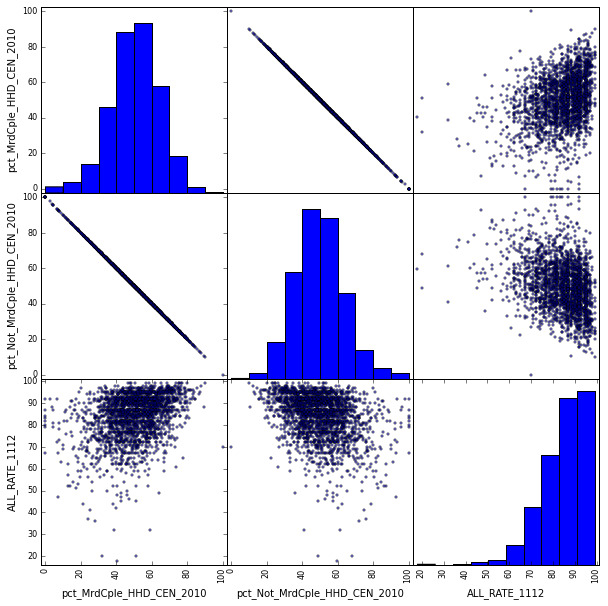

In [53]:
#impact of household marriage (single family or not)
from pandas.tools.plotting import scatter_matrix
scat = scatter_matrix(family, figsize = (10,10))

### Part 2:

#### Feature Importance

In [54]:
feature_names = att.columns[2:-1]
features = att[['pct_College_ACS_08_12','pct_Born_US_ACS_08_12','pct_MrdCple_HHD_CEN_2010','pct_URBANIZED_AREA_POP_CEN_2010','pct_URBAN_CLUSTER_POP_CEN_2010','pct_HHD_Moved_in_ACS_08_12', 'pct_Prs_Blw_Pov_Lev_ACS_08_12', 'pct_Age5p_Only_Eng_ACS_08_12', 'pct_Othr_Lang_ACS_08_12','pct_Civ_emp_16p_ACS_08_12','pct_Rel_Family_HHDS_CEN_2010','pct_Mobile_Homes_ACS_08_12']]

In [55]:
features.isnull().sum()

pct_College_ACS_08_12              13
pct_Born_US_ACS_08_12              12
pct_MrdCple_HHD_CEN_2010           12
pct_URBANIZED_AREA_POP_CEN_2010     9
pct_URBAN_CLUSTER_POP_CEN_2010      9
pct_HHD_Moved_in_ACS_08_12          0
pct_Prs_Blw_Pov_Lev_ACS_08_12       0
pct_Age5p_Only_Eng_ACS_08_12        0
pct_Othr_Lang_ACS_08_12             0
pct_Civ_emp_16p_ACS_08_12          13
pct_Rel_Family_HHDS_CEN_2010       12
pct_Mobile_Homes_ACS_08_12         20
dtype: int64

In [56]:
avg_college = att.pct_College_ACS_08_12[att.pct_College_ACS_08_12.notnull()].mean()
att.pct_College_ACS_08_12.fillna(avg_college, inplace=True)

In [57]:
avg_ctz = att.pct_Born_US_ACS_08_12[att.pct_Born_US_ACS_08_12.notnull()].mean()
att.pct_Born_US_ACS_08_12.fillna(avg_ctz, inplace=True)

In [58]:
avg_mrd = att.pct_MrdCple_HHD_CEN_2010[att.pct_MrdCple_HHD_CEN_2010.notnull()].mean()
att.pct_MrdCple_HHD_CEN_2010.fillna(avg_mrd, inplace=True)

In [59]:
avg_emp = att.pct_Civ_emp_16p_ACS_08_12[att.pct_Civ_emp_16p_ACS_08_12.notnull()].mean()
att.pct_Civ_emp_16p_ACS_08_12.fillna(avg_emp, inplace=True)

In [60]:
att.pct_Civ_emp_16p_ACS_08_12.isnull().sum()

0

In [61]:
avg_Rel_Family = att.pct_Rel_Family_HHDS_CEN_2010[att.pct_Rel_Family_HHDS_CEN_2010.notnull()].mean()
att.pct_Rel_Family_HHDS_CEN_2010.fillna(avg_Rel_Family, inplace=True)

In [62]:
att.pct_Rel_Family_HHDS_CEN_2010.isnull().sum()

0

In [63]:
avg_MH = att.pct_Mobile_Homes_ACS_08_12[att.pct_Mobile_Homes_ACS_08_12.notnull()].mean()
att.pct_Mobile_Homes_ACS_08_12.fillna(avg_MH, inplace=True)

In [64]:
att.pct_Mobile_Homes_ACS_08_12.isnull().sum()

0

In [65]:
avg_urban = att.pct_URBANIZED_AREA_POP_CEN_2010[att.pct_URBANIZED_AREA_POP_CEN_2010.notnull()].mean()
att.pct_URBANIZED_AREA_POP_CEN_2010.fillna(avg_urban, inplace=True)

In [66]:
att.pct_URBANIZED_AREA_POP_CEN_2010.isnull().sum()

0

In [67]:
avg_ub = att.pct_URBAN_CLUSTER_POP_CEN_2010[att.pct_URBAN_CLUSTER_POP_CEN_2010.notnull()].mean()
att.pct_URBAN_CLUSTER_POP_CEN_2010.fillna(avg_ub, inplace=True)

In [68]:
att.pct_URBAN_CLUSTER_POP_CEN_2010.isnull().sum()

0

In [69]:
features = att[['pct_College_ACS_08_12','pct_Born_US_ACS_08_12','pct_MrdCple_HHD_CEN_2010','pct_URBANIZED_AREA_POP_CEN_2010','pct_URBAN_CLUSTER_POP_CEN_2010','pct_HHD_Moved_in_ACS_08_12', 'pct_Prs_Blw_Pov_Lev_ACS_08_12', 'pct_Age5p_Only_Eng_ACS_08_12', 'pct_Othr_Lang_ACS_08_12','pct_Civ_emp_16p_ACS_08_12','pct_Rel_Family_HHDS_CEN_2010','pct_Mobile_Homes_ACS_08_12']]

In [70]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2317 entries, 0 to 2316
Data columns (total 12 columns):
pct_College_ACS_08_12              2317 non-null float64
pct_Born_US_ACS_08_12              2317 non-null float64
pct_MrdCple_HHD_CEN_2010           2317 non-null float64
pct_URBANIZED_AREA_POP_CEN_2010    2317 non-null float64
pct_URBAN_CLUSTER_POP_CEN_2010     2317 non-null float64
pct_HHD_Moved_in_ACS_08_12         2317 non-null float64
pct_Prs_Blw_Pov_Lev_ACS_08_12      2317 non-null float64
pct_Age5p_Only_Eng_ACS_08_12       2317 non-null float64
pct_Othr_Lang_ACS_08_12            2317 non-null float64
pct_Civ_emp_16p_ACS_08_12          2317 non-null float64
pct_Rel_Family_HHDS_CEN_2010       2317 non-null float64
pct_Mobile_Homes_ACS_08_12         2317 non-null float64
dtypes: float64(12)
memory usage: 235.3 KB


In [71]:
features.isnull().sum()

pct_College_ACS_08_12              0
pct_Born_US_ACS_08_12              0
pct_MrdCple_HHD_CEN_2010           0
pct_URBANIZED_AREA_POP_CEN_2010    0
pct_URBAN_CLUSTER_POP_CEN_2010     0
pct_HHD_Moved_in_ACS_08_12         0
pct_Prs_Blw_Pov_Lev_ACS_08_12      0
pct_Age5p_Only_Eng_ACS_08_12       0
pct_Othr_Lang_ACS_08_12            0
pct_Civ_emp_16p_ACS_08_12          0
pct_Rel_Family_HHDS_CEN_2010       0
pct_Mobile_Homes_ACS_08_12         0
dtype: int64

In [72]:
X = features
y = att.ALL_RATE_1112

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import numpy as np

treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=1, splitter='best')

In [74]:
print treeclf.feature_importances_

[ 0.25162107  0.11953674  0.          0.19880047  0.          0.
  0.25708718  0.          0.09325852  0.07969603  0.          0.        ]


poverty level, education level among population, urbanize of living area, citizensip, languate speaking and employement status are the most important features related to graduation rate.

##### Build a model using decision tree to predict GR for following years

In [76]:
features = att[['pct_College_ACS_08_12','pct_Born_US_ACS_08_12','pct_MrdCple_HHD_CEN_2010','pct_URBANIZED_AREA_POP_CEN_2010','pct_URBAN_CLUSTER_POP_CEN_2010','pct_HHD_Moved_in_ACS_08_12', 'pct_Prs_Blw_Pov_Lev_ACS_08_12', 'pct_Age5p_Only_Eng_ACS_08_12', 'pct_Othr_Lang_ACS_08_12','pct_Civ_emp_16p_ACS_08_12','pct_Rel_Family_HHDS_CEN_2010','pct_Mobile_Homes_ACS_08_12']]
X = features
y = att.ALL_RATE_1112

In [77]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [78]:
print X_train
print y_train
print X_test
print y_test

      pct_College_ACS_08_12  pct_Born_US_ACS_08_12  pct_MrdCple_HHD_CEN_2010  \
1412              21.861626              97.622339                     44.46   
634               19.924386             100.000000                     36.31   
2158              41.569568              91.996119                     59.85   
927               33.826138              96.886228                     22.01   
1791               9.739188              99.034414                     51.59   
1218              22.051756              98.436884                     61.84   
983               45.290859              96.306069                     39.20   
2203               7.318203              84.116273                     31.54   
264                3.416856              79.984721                     50.97   
227               56.905421              83.108302                     59.28   
299               23.861603              96.758174                     54.71   
2159              69.157472             

In [79]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=1, splitter='best')

In [80]:
preds = treereg.predict(X_test)
print preds
print y_test

[ 87.    77.    87.    97.    96.    59.    92.    90.    96.    93.    83.
  92.    77.    88.    92.    87.    83.    84.    45.    85.    92.    95.
  95.    77.    86.    90.    37.    91.    52.    79.    76.    77.    82.
  89.    52.    56.    93.    80.    88.    62.    85.    92.    91.    87.
  90.    68.    79.    87.    69.    85.    56.    90.    89.    67.    90.
  61.    92.    79.    86.    63.    74.    81.    95.    82.    85.    87.
  20.    91.    66.    92.    90.    74.    79.    45.    82.    84.    91.
  86.    66.    91.    65.    94.    79.    65.    88.    95.    93.    94.
  82.    79.    67.    93.    82.    48.    93.    87.    94.    76.    93.
  84.5   90.    83.    88.    67.    82.    67.    87.    73.    84.    82.
  77.    73.    71.    94.    60.    91.    77.    77.    81.    84.    96.
  81.    87.    84.    80.    86.    87.    86.    84.    94.    99.    85.
  72.    69.    87.    97.    81.    95.    92.    86.    92.    82.    67.
  94.    92.

In [81]:
from sklearn import cross_validation
cross_validation.cross_val_score(treereg, X, y, cv=5).mean()

-0.98196170798936711

##### Random forest feature importances

In [82]:
from sklearn.cross_validation import ShuffleSplit
feature_columns='pct_College_ACS_08_12,pct_Born_US_ACS_08_12,pct_MrdCple_HHD_CEN_2010,pct_URBANIZED_AREA_POP_CEN_2010,pct_URBAN_CLUSTER_POP_CEN_2010,pct_HHD_Moved_in_ACS_08_12,pct_Prs_Blw_Pov_Lev_ACS_08_12,pct_Age5p_Only_Eng_ACS_08_12,pct_Othr_Lang_ACS_08_12,pct_Civ_emp_16p_ACS_08_12,pct_Rel_Family_HHDS_CEN_2010,pct_Mobile_Homes_ACS_08_12'.split(',')
for train,test in ShuffleSplit(len(att),test_size=.2,n_iter = 1):

    X_train = att[feature_columns].iloc[train]
    y_train = att['ALL_RATE_1112'].iloc[train]
    X_test = att[feature_columns].iloc[test]
    y_test = att['ALL_RATE_1112'].iloc[test]

In [86]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rfc = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=3)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=3, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [87]:
pd.DataFrame({'feature':feature_columns, 'importance':rfc.feature_importances_ })

,feature,importance
0,pct_College_ACS_08_12,0.115830
1,pct_Born_US_ACS_08_12,0.091300
2,pct_MrdCple_HHD_CEN_2010,0.101139
3,pct_URBANIZED_AREA_POP_CEN_2010,0.047658
4,pct_URBAN_CLUSTER_POP_CEN_2010,0.027486
5,pct_HHD_Moved_in_ACS_08_12,0.061377
6,pct_Prs_Blw_Pov_Lev_ACS_08_12,0.114648
7,pct_Age5p_Only_Eng_ACS_08_12,0.086568
8,pct_Othr_Lang_ACS_08_12,0.086265
9,pct_Civ_emp_16p_ACS_08_12,0.123022
